In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import constants
sns.set_context(constants.sns_context)
sns.set_style(constants.sns_style)
data_dir = "/home/cadel/projects/thesis/UNSWThesis/data/synteny"

# Data preparation

In [3]:
assemblies = ["canetoad", "starling", "tigersnake", "sandy"] # TODO add sandy
excluded = ["canetoad.v3.7b.repeats", "canetoad.v3.7d.junk", "canetoad.v3.7c.quarantine", "canetoad.v3.8b.plusmt", "BUSCOMP"]

metadata = pd.read_csv(os.path.join(data_dir, "..", "completeness", "assemblies.tsv"), delimiter="\t", names=["Iteration", "Organism", "Genome", "Stage", "Tools"])
metadata.Genome = metadata.Genome.map(lambda x: x.replace('.fasta', ''))
metadata


,Iteration,Organism,Genome,Stage,Tools
0,1,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova
1,2,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus
2,3,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE"
3,4,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher"
4,5,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder
...,...,...,...,...,...
63,35,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner
64,36,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner
65,37,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo
66,38,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA


In [4]:
from functools import reduce

max_length_range = [0,1,2,3,4,5,10,100]

dfs = []
for assembly in assemblies:
    for max_length in max_length_range:
        b = pd.read_csv(os.path.join(data_dir, assembly, f"deduce_pairs_{max_length}.csv"))
        b = b[~(b.assembly.isin(excluded))]
        b["max_gap"] = np.repeat(max_length, len(b))
        b["assembly"] = b["assembly"].map(lambda x: x.replace(".fasta", ""))
        dfs.append(b)

deduce = reduce(lambda x, acc: pd.concat([x,acc]), dfs)
deduce.head()

,assembly,valid,score,max_gap
0,canetoad.v2.2,53,35.5,0
1,canetoad.v3.0.flye,61,44.0,0
2,canetoad.v3.1.tidy,61,44.0,0
3,canetoad.v3.2.hypo,64,46.0,0
4,canetoad.v3.3.arcs,69,48.5,0


In [5]:
full_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(data_dir, assembly, f"deduce_pairs_10_full.csv"))
    b = b[~(b.assembly.isin(excluded))]
    b["assembly"] = b["assembly"].map(lambda x: x.replace(".fasta", ""))
    full_dfs.append(b)

deduce_full = reduce(lambda x, acc: pd.concat([x,acc]), full_dfs)
deduce_full.head()

,assembly,total,valid,score,average_consensus,unique_uces,nonunique_uces
0,canetoad.v2.2,136,87,46.658442,1.287356,409,0
1,canetoad.v3.0.flye,159,117,62.984163,1.358974,417,0
2,canetoad.v3.1.tidy,161,118,63.184163,1.355932,417,0
3,canetoad.v3.2.hypo,175,125,66.623052,1.352000,431,0
4,canetoad.v3.3.arcs,212,150,75.908009,1.353333,432,0


In [6]:
assembly_data = pd.merge(metadata, deduce, how="outer", left_on="Genome", right_on="assembly")

assembly_data = assembly_data[~assembly_data["Iteration"].isna()]
assembly_data['max_gap'] = assembly_data.max_gap.astype('category')

assembly_data

,Iteration,Organism,Genome,Stage,Tools,assembly,valid,score,max_gap
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,8089,6600.500000,0
1,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,10195,7748.500000,1
2,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,10836,8003.250000,2
3,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,11047,8069.450000,3
4,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,11108,8085.116667,4
...,...,...,...,...,...,...,...,...,...
539,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Scaffolding,Juicer,tigersnake.v2.21b.HiC-Rev1,1025,699.883333,3
540,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Scaffolding,Juicer,tigersnake.v2.21b.HiC-Rev1,1033,701.716667,4
541,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Scaffolding,Juicer,tigersnake.v2.21b.HiC-Rev1,1046,703.573810,5
542,39.0,tigersnake,tigersnake.v2.21b.HiC-Rev1,Scaffolding,Juicer,tigersnake.v2.21b.HiC-Rev1,1054,704.422294,10


In [7]:
assembly_data_full = pd.merge(metadata, deduce_full, how="outer", left_on="Genome", right_on="assembly")

assembly_data_full = assembly_data_full[~assembly_data_full["Iteration"].isna()]

assembly_data_full["valid_%"] = assembly_data_full["valid"] / assembly_data_full["total"]
assembly_data_full

,Iteration,Organism,Genome,Stage,Tools,assembly,total,valid,score,average_consensus,unique_uces,nonunique_uces,valid_%
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,12163.0,11155.0,8094.572294,1.628149,13177.0,0.0,0.917126
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,step2_svulgaris-10x-550M-sub80.pri,12164.0,11151.0,8093.196104,1.628374,13174.0,0.0,0.916721
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",step3_scaffolds,12798.0,11868.0,8805.722547,1.674250,13182.0,0.0,0.927332
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",step4_scaffolds_gapfilled_FINAL,12779.0,11871.0,8798.211833,1.673069,13166.0,0.0,0.928946
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,step5_L_RNA_scaffolder,12793.0,11812.0,8676.728499,1.659245,13165.0,0.0,0.923317
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,35.0,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,tigersnake.v2.19c.gapspanner.gapfill,1159.0,1087.0,761.719156,1.544618,1212.0,0.0,0.937877
64,36.0,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,tigersnake.v2.19d.gapspanner,1167.0,1090.0,792.996934,1.604587,1212.0,0.0,0.934019
65,37.0,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,tigersnake.v2.20.hypo3,1173.0,1093.0,796.219156,1.606587,1218.0,0.0,0.931799
66,38.0,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,tigersnake.v2.21a.3d-dna,1176.0,1054.0,705.297294,1.483871,1218.0,0.0,0.896259


# Relationship between variables

/tmp/ipykernel_6773/3214498859.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  norm[v] = norm.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())[v]


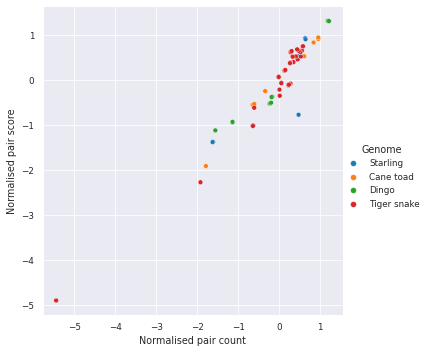

In [68]:
norm = assembly_data_full.copy()
#normalise_variables = ["valid", "score", "average_consensus", "valid_%"]
normalise_variables = ["valid", "score"]

for v in normalise_variables:
    norm[v] = norm.groupby('Organism').transform(lambda x: (x - x.mean()) / x.std())[v]

p = sns.relplot(data=norm, x="valid", y="score", hue="Organism")
p._legend.set_title("Genome")

p._legend.texts[0].set_text("Starling")
p._legend.texts[1].set_text("Cane toad")
p._legend.texts[2].set_text("Dingo")
p._legend.texts[3].set_text("Tiger snake")

p.set_ylabels("Normalised pair score")
p.set_xlabels("Normalised pair count")
p.savefig(os.path.join(constants.image_out_dir, "pairscorevscount.pdf"))


# Effect of parameters

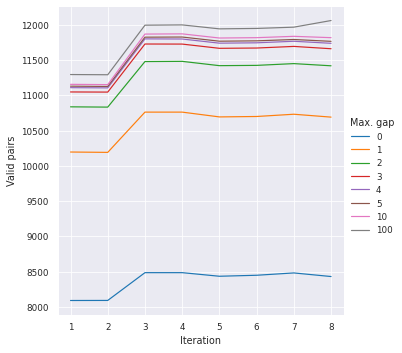

In [8]:
numpairs_starling = sns.relplot(data=assembly_data[(assembly_data.Organism=="starling")], x="Iteration", y="valid", kind="line", hue="max_gap")
numpairs_starling.set_ylabels("Valid pairs")
numpairs_starling._legend.set_title("Max. gap")
#sns.set(rc = {'legend.labelspacing': 1})
numpairs_starling.fig.savefig(os.path.join(constants.image_out_dir, "pairsmaxgap.pdf"))

#sns.relplot(data=assembly_data[(assembly_data.Organism=="starling")], x="Iteration", y="score", kind="line", hue="max_gap")

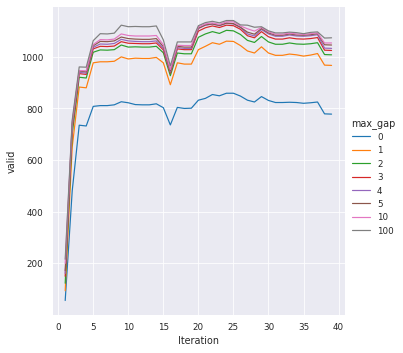

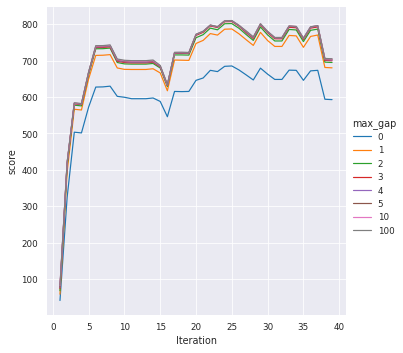

In [9]:
sns.relplot(data=assembly_data[(assembly_data.Organism=="tigersnake")], x="Iteration", y="valid", kind="line", hue="max_gap")
sns.relplot(data=assembly_data[(assembly_data.Organism=="tigersnake")], x="Iteration", y="score", kind="line", hue="max_gap")

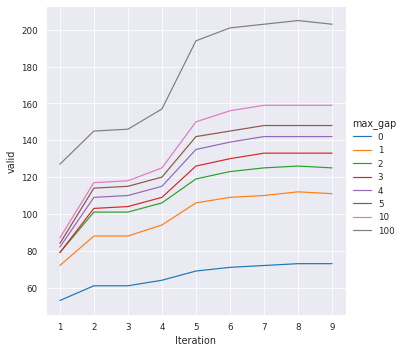

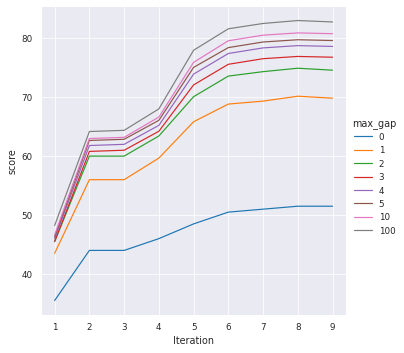

In [10]:
sns.relplot(data=assembly_data[(assembly_data.Organism=="canetoad")], x="Iteration", y="valid", kind="line", hue="max_gap")
sns.relplot(data=assembly_data[(assembly_data.Organism=="canetoad")], x="Iteration", y="score", kind="line", hue="max_gap")

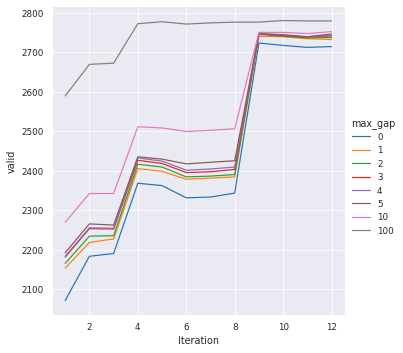

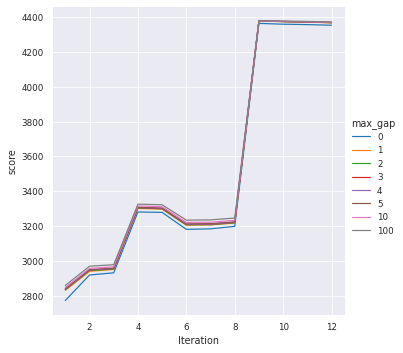

In [11]:
sns.relplot(data=assembly_data[(assembly_data.Organism=="sandy")], x="Iteration", y="valid", kind="line", hue="max_gap")
sns.relplot(data=assembly_data[(assembly_data.Organism=="sandy")], x="Iteration", y="score", kind="line", hue="max_gap")

# Effect of assembly change

In [12]:
def make_stage_chart(assembly_data, organism, max_gap=0, palette="all"):
    agg_data = assembly_data[(assembly_data.Organism == organism) & (assembly_data.max_gap == max_gap)].melt(id_vars=['Iteration', 'Organism', 'Genome', 'Stage', 'Tools'])

    # C1: assembly
    # C2: scaffolding / fixing / reduction / tidying
    # C3: polishing / gapfilling / mapping
    palettes = {
        "all": {'Assembly': 'C9', 'Initial assembly': 'C8', 'Mapping': 'C7', 'Gapfilling': 'C6', 'Fixing': 'C5', 'Polishing': 'C4', 'Reduction': 'C3', 'Scaffolding': 'C1', 'Tidying': 'C2'},
        "simple": {'Assembly': 'C1', 'Initial assembly': 'C1', 'Mapping': 'C2', 'Gapfilling': 'C3', 'Fixing': 'C2', 'Polishing': 'C3', 'Reduction': 'C2', 'Scaffolding': 'C2', 'Tidying': 'C2'},
        "scaffolding": {'Assembly': 'grey', 'Initial assembly': 'grey', 'Mapping': 'grey', 'Gapfilling': 'grey', 'Fixing': 'grey', 'Polishing': 'grey', 'Reduction': 'grey', 'Scaffolding': 'orange', 'Tidying': 'grey'},
        "polishing": {'Assembly': 'grey', 'Initial assembly': 'grey', 'Mapping': 'grey', 'Gapfilling': 'grey', 'Fixing': 'grey', 'Polishing': 'orange', 'Reduction': 'grey', 'Scaffolding': 'grey', 'Tidying': 'grey'},

    }

    c_palette = {}
    for row in agg_data.to_records():
        c_palette[row[1]] = palettes[palette][row[4]]

    g = sns.catplot(data=agg_data[(agg_data.variable=="valid")], x="Iteration", y="value", kind="bar", palette=c_palette)
    g.fig.suptitle(f"{organism} - valid pairs")
    for ax in g.axes.flat:ax.tick_params(axis='x', rotation=90)

    g = sns.catplot(data=agg_data[(agg_data.variable=="score")], x="Iteration", y="value", kind="bar", palette=c_palette)
    g.fig.suptitle(f"{organism} - pair score")
    for ax in g.axes.flat:ax.tick_params(axis='x', rotation=90)

    # scaffolding green, polishing red
    #i= sns.catplot(data=agg_data[(agg_data.Iteration != 2.0) & (agg_data.variable=="deduce_hit_%")], x="Iteration", y="value",  palette=palette)


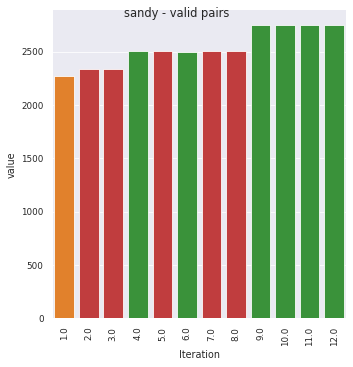

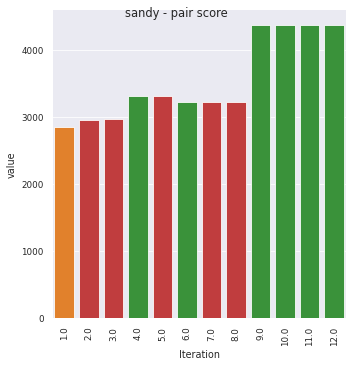

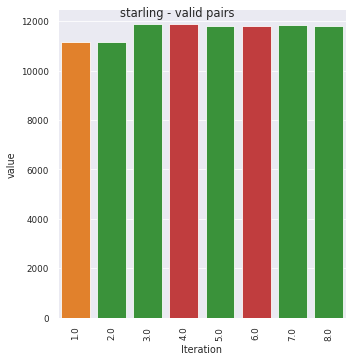

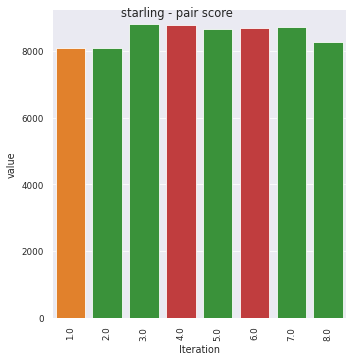

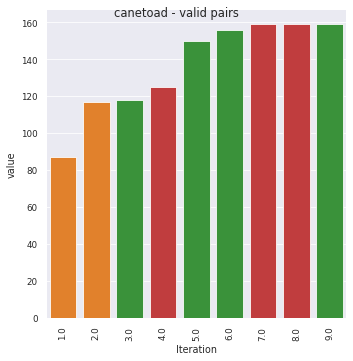

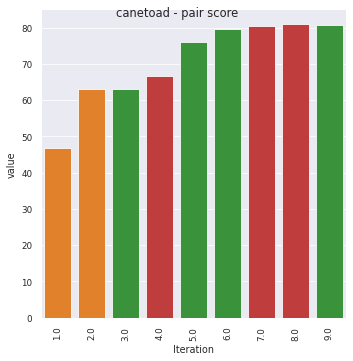

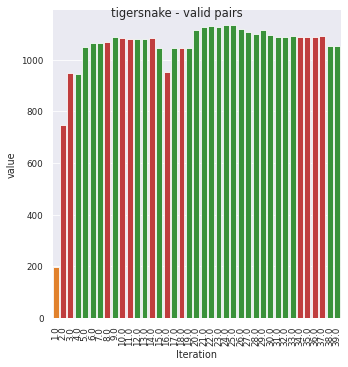

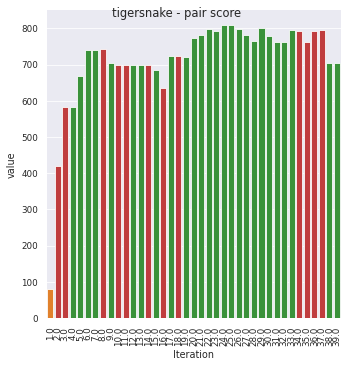

In [13]:
make_stage_chart(assembly_data, "sandy", max_gap=10, palette="simple")
make_stage_chart(assembly_data, "starling", max_gap=10, palette="simple")
make_stage_chart(assembly_data, "canetoad", max_gap=10, palette="simple")
make_stage_chart(assembly_data, "tigersnake", max_gap=10, palette="simple")

In [14]:
by_stage_df = assembly_data_full.copy()
diff_vars = ["valid_%", "total","valid", "score", "average_consensus", "unique_uces"]
for dv in diff_vars:
    by_stage_df[f"{dv}_diff"] = by_stage_df.groupby(['Organism'])[dv].transform(lambda x: x.diff())

by_stage_df

,Iteration,Organism,Genome,Stage,Tools,assembly,total,valid,score,average_consensus,unique_uces,nonunique_uces,valid_%,valid_%_diff,total_diff,valid_diff,score_diff,average_consensus_diff,unique_uces_diff
0,1.0,starling,step1_svulgaris-10x-550M-sub80.1,Initial assembly,Supernova,step1_svulgaris-10x-550M-sub80.1,12163.0,11155.0,8094.572294,1.628149,13177.0,0.0,0.917126,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,starling,step2_svulgaris-10x-550M-sub80.pri,Tidying,Diploidocus,step2_svulgaris-10x-550M-sub80.pri,12164.0,11151.0,8093.196104,1.628374,13174.0,0.0,0.916721,-0.000404,1.0,-4.0,-1.376190,0.000225,-3.0
2,3.0,starling,step3_scaffolds,Scaffolding,"SLR, SSPACE",step3_scaffolds,12798.0,11868.0,8805.722547,1.674250,13182.0,0.0,0.927332,0.010611,634.0,717.0,712.526443,0.045876,8.0
3,4.0,starling,step4_scaffolds_gapfilled_FINAL,Gapfilling,"LR_GapCloser, GapFinisher",step4_scaffolds_gapfilled_FINAL,12779.0,11871.0,8798.211833,1.673069,13166.0,0.0,0.928946,0.001614,-19.0,3.0,-7.510714,-0.001181,-16.0
4,5.0,starling,step5_L_RNA_scaffolder,Scaffolding,L_RNA_Scaffolder,step5_L_RNA_scaffolder,12793.0,11812.0,8676.728499,1.659245,13165.0,0.0,0.923317,-0.005628,14.0,-59.0,-121.483333,-0.013824,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,35.0,tigersnake,tigersnake.v2.19c.gapspanner.gapfill,Gapfilling,Gapspanner,tigersnake.v2.19c.gapspanner.gapfill,1159.0,1087.0,761.719156,1.544618,1212.0,0.0,0.937877,0.007108,-11.0,-2.0,-32.277778,-0.062361,-3.0
64,36.0,tigersnake,tigersnake.v2.19d.gapspanner,Gapfilling,Gapspanner,tigersnake.v2.19d.gapspanner,1167.0,1090.0,792.996934,1.604587,1212.0,0.0,0.934019,-0.003859,8.0,3.0,31.277778,0.059969,0.0
65,37.0,tigersnake,tigersnake.v2.20.hypo3,Polishing,HyPo,tigersnake.v2.20.hypo3,1173.0,1093.0,796.219156,1.606587,1218.0,0.0,0.931799,-0.002220,6.0,3.0,3.222222,0.002000,6.0
66,38.0,tigersnake,tigersnake.v2.21a.3d-dna,Scaffolding,3D-DNA,tigersnake.v2.21a.3d-dna,1176.0,1054.0,705.297294,1.483871,1218.0,0.0,0.896259,-0.035540,3.0,-39.0,-90.921861,-0.122716,0.0


<AxesSubplot:xlabel='Stage', ylabel='score_diff'>

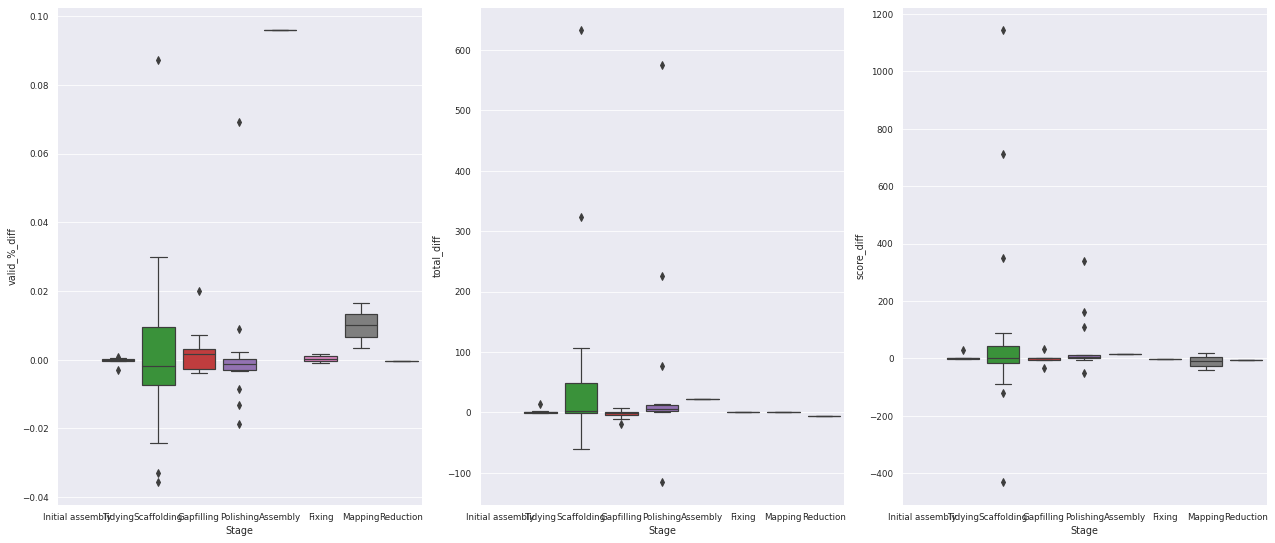

In [15]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1,figsize=(18, 8))
fig.tight_layout(pad=3.0)
sns.boxplot(x="Stage", y="valid_%_diff", data=by_stage_df, ax=ax1)
sns.boxplot(x="Stage", y="total_diff", data=by_stage_df, ax=ax2)
sns.boxplot(x="Stage", y="score_diff", data=by_stage_df, ax=ax3)


# Comparison to other metrics

In [16]:
from functools import reduce

buscomp_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(data_dir, "..", "completeness", assembly, "busco", "buscomp.tdt"), delimiter="\t")
    b = b[~(b.Genome.isin(excluded))]
    buscomp_dfs.append(b)

buscomp = reduce(lambda x, acc: pd.concat([x,acc]), buscomp_dfs)
buscomp.head()

,#,Genome,N,Identical,Complete,Single,Duplicated,Fragmented,Partial,Ghost,Missing
0,1,canetoad.v2.2,254,21,229,227,2,12,5,3,5
1,2,canetoad.v3.0.flye,254,19,244,241,3,9,0,1,0
2,3,canetoad.v3.1.tidy,254,18,244,244,0,9,0,1,0
3,4,canetoad.v3.2.hypo,254,19,244,244,0,9,0,1,0
4,5,canetoad.v3.3.arcs,254,19,251,251,0,3,0,0,0


In [17]:
busco_dfs = []
for assembly in assemblies:
    b = pd.read_csv(os.path.join(data_dir, "..", "completeness", assembly, "busco", "busco.tdt"), delimiter="\t")
    b = b.drop(columns=['#', 'Directory', 'Prefix', 'Fasta', 'Sequences', 'Table', 'Description'])
    b = b[~(b.Genome.isin(excluded))]
    busco_dfs.append(b)

busco = reduce(lambda x, acc: pd.concat([x,acc]), busco_dfs)
busco.head()

,Genome,SeqNum,TotLength,MinLength,MaxLength,MeanLength,MedLength,N50Length,L50Count,CtgNum,...,NG50Length,LG50Count,GapLength,GapCount,GC,N,Duplicated,Complete,Fragmented,Missing
0,canetoad.v2.2,31392.0,2.551760e+09,13.0,3525316.0,81286.957155,38587.5,167498.0,3373.0,31392.0,...,74229.0,8039.0,0.0,0.0,43.23,255,3,238,8,6
1,canetoad.v3.0.flye,34646.0,3.565374e+09,108.0,8272080.0,102908.680656,16372.0,451739.0,1843.0,35140.0,...,451739.0,1843.0,49400.0,494.0,43.76,255,5,243,7,0
2,canetoad.v3.1.tidy,22586.0,3.446282e+09,501.0,8272080.0,152584.863987,45808.0,478898.0,1715.0,23068.0,...,451739.0,1843.0,48200.0,482.0,43.74,255,1,247,7,0
3,canetoad.v3.2.hypo,22586.0,3.452657e+09,500.0,8286251.0,152867.149739,45909.0,479469.0,1716.0,22762.0,...,454170.0,1837.0,17600.0,176.0,43.74,255,1,248,6,0
4,canetoad.v3.3.arcs,14471.0,3.453469e+09,500.0,12576705.0,238647.567134,16847.0,1626478.0,547.0,22762.0,...,1550763.0,582.0,829100.0,8291.0,43.74,255,1,251,3,0


In [18]:
metrics = pd.merge(assembly_data, busco, how="outer", left_on="Genome", right_on="Genome", suffixes=(None, "_busco"))
metrics = pd.merge(metrics, buscomp, how="outer", left_on="Genome", right_on="Genome",suffixes=(None, "_buscomp"))
metrics = metrics[(~metrics.Iteration.isna()) & (~metrics.N_buscomp.isna()) & (~metrics["N"].isna())]

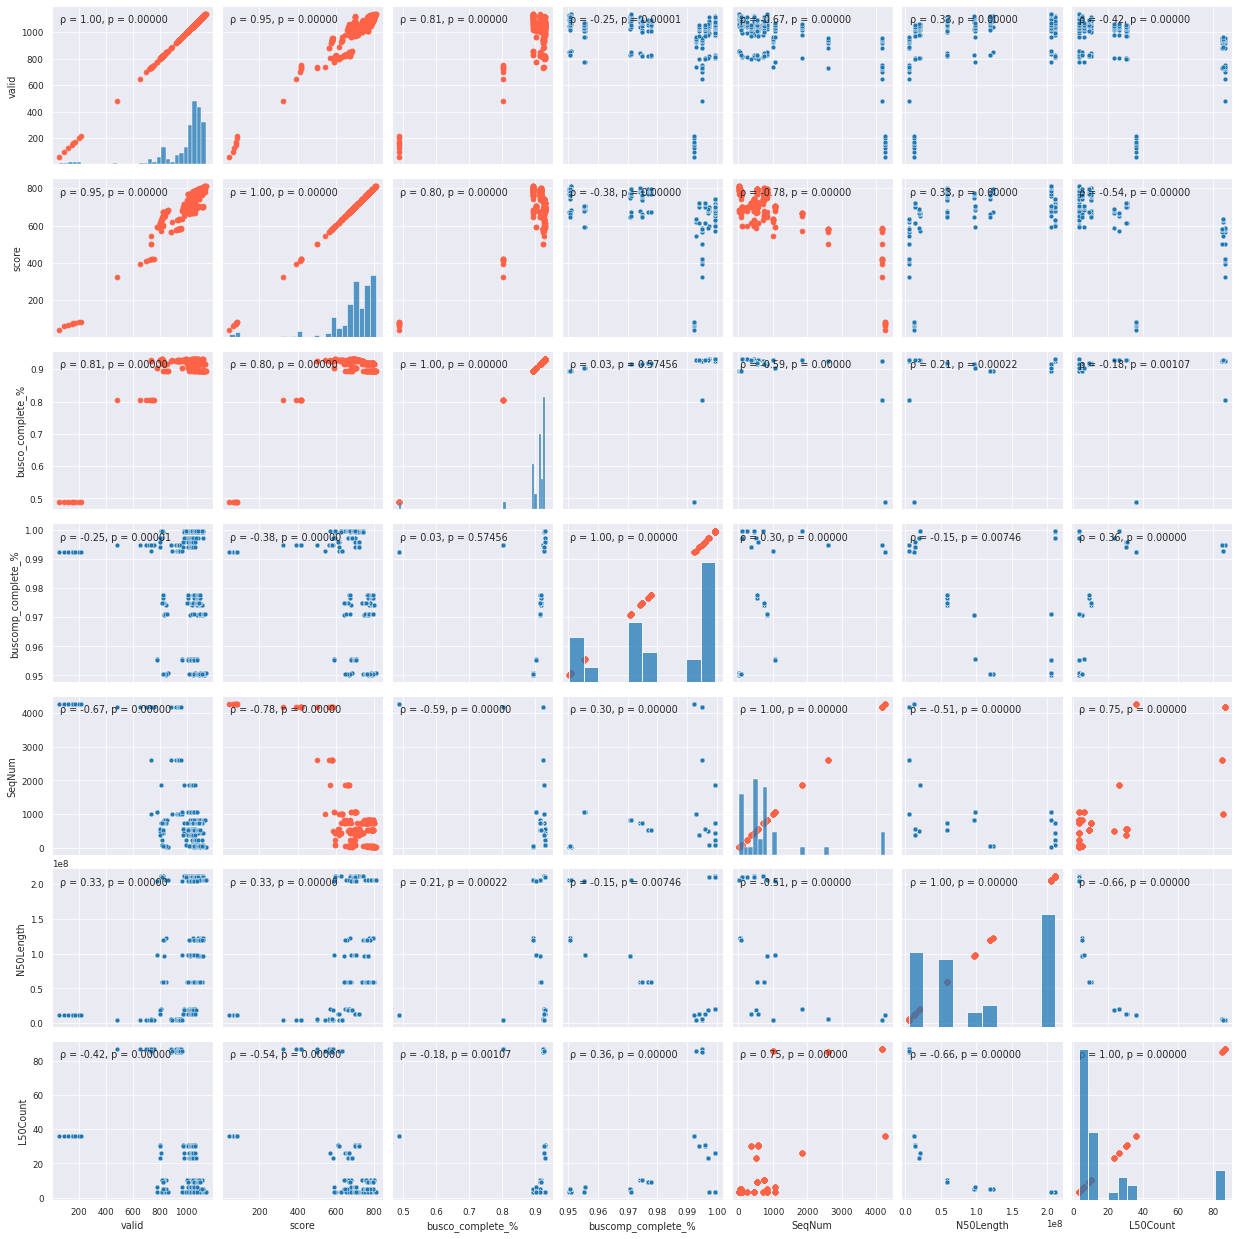

In [19]:
metrics["buscomp_complete_%"] = metrics["Complete_buscomp"] / (metrics["N_buscomp"])
metrics["busco_complete_%"] = metrics["Complete"] / (metrics["N"])

# https://stackoverflow.com/a/50835066
from scipy.stats import pearsonr

def corrfunc(x, y, ax=None, **kws):
    n=len(x)
    r, p = pearsonr(x, y)
    ax = ax or plt.gca()

    ax.annotate(f'ρ = {r:.2f}, p = {p:.5f}', xy=(.05, .9), xycoords=ax.transAxes)

    if p < 0.001 and abs(r) >= 0.7:
        kws['color'] = 'tomato'

        plt.scatter(x,y,**kws)

corr_vars = ["valid", "score", "busco_complete_%", "buscomp_complete_%", "SeqNum", "N50Length", "L50Count"]
in_g = sns.pairplot(data=metrics[metrics.Organism == "tigersnake"], y_vars=corr_vars, x_vars=corr_vars)
in_g.map(corrfunc)

In [20]:
print("assembly\tN50\tL50\tBUSCO\tBUSCOMP")

for assembly in assemblies:
    filtered = metrics[(metrics.Organism==assembly) & (metrics.max_gap==10)]

    print(f'{assembly}\t{filtered["score"].corr(filtered["N50Length"])}\t{filtered["score"].corr(filtered["L50Count"])}\t{filtered["score"].corr(filtered["Complete"])}\t{filtered["score"].corr(filtered["Complete_buscomp"])}')


assembly	N50	L50	BUSCO	BUSCOMP
canetoad	0.9150537982009401	-0.9941737790166617	0.9587002673256051	0.9787807890913794
starling	-0.21403641739043275	-0.7174719955685791	0.3466538162582848	0.7932058110659658
tigersnake	0.3434398682731843	-0.5631205612680343	0.82339273490137	-0.4043342000564119
sandy	0.6003283012063003	-0.6001719095252759	0.4494077591861504	-0.2009883061675215


In [21]:
def corr_metrics(metrics, organism, max_gaps=0):
    ts = sns.pairplot(data=metrics[(metrics.Organism==organism) & (metrics.max_gap==max_gaps)], corner=True, y_vars=corr_vars, x_vars=corr_vars)
    ts.map_offdiag(corrfunc)

    ts.axes[0][0].set_ylabel("Valid pairs")
    ts.axes[1][0].set_ylabel("Pair score")
    ts.axes[2][0].set_ylabel("BUSCO")
    ts.axes[3][0].set_ylabel("BUSCOMP")
    ts.axes[4][0].set_ylabel("SeqNum")
    ts.axes[5][0].set_ylabel("N50")
    ts.axes[6][0].set_ylabel("L50")

    ts.axes[6][0].set_xlabel("Valid pairs")
    ts.axes[6][1].set_xlabel("Pair score")
    ts.axes[6][2].set_xlabel("BUSCO")
    ts.axes[6][3].set_xlabel("BUSCOMP")
    ts.axes[6][4].set_xlabel("SeqNum")
    ts.axes[6][5].set_xlabel("N50")
    ts.axes[6][6].set_xlabel("L50")



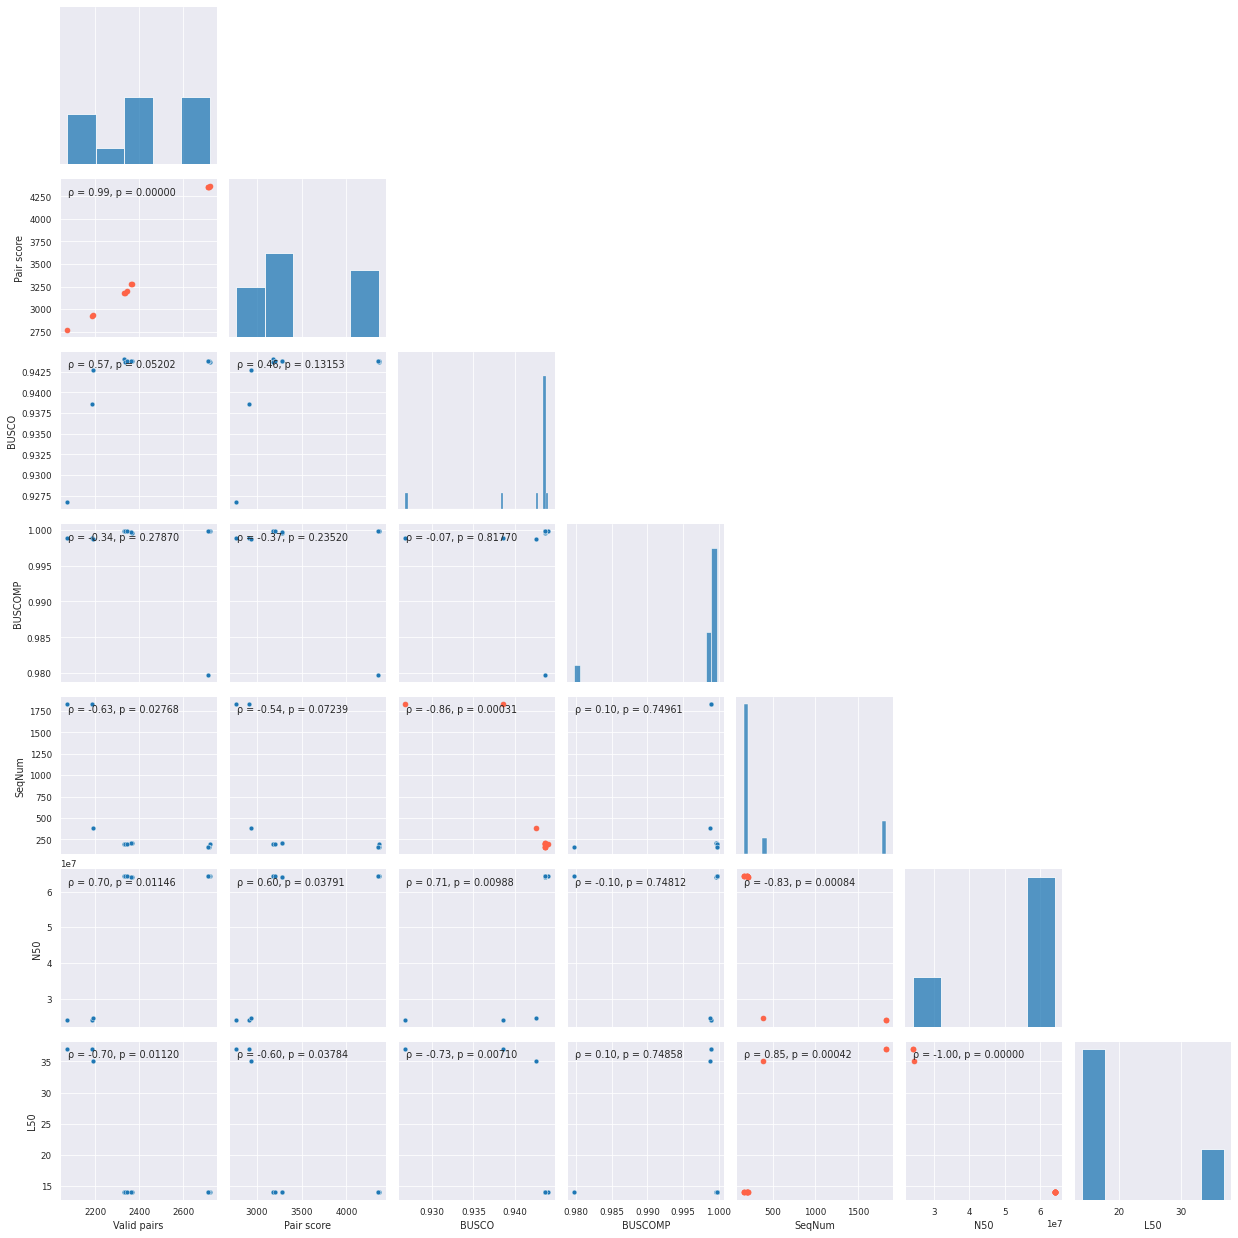

In [22]:
corr_metrics(metrics, "sandy")

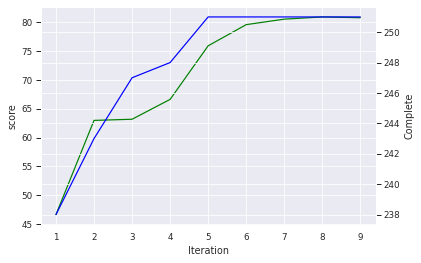

In [23]:
import matplotlib.pyplot as plt

def comparison_chart(metrics, genome):
    sns.lineplot(data=metrics[(metrics.Organism==genome) & (metrics.max_gap == 10)], color="g", x="Iteration", y="score")
    ax2 = plt.twinx()
    sns.lineplot(data=metrics[(metrics.Organism==genome) & (metrics.max_gap == 10)], color="b", ax=ax2, x="Iteration", y="Complete")
    
comparison_chart(metrics, "canetoad")

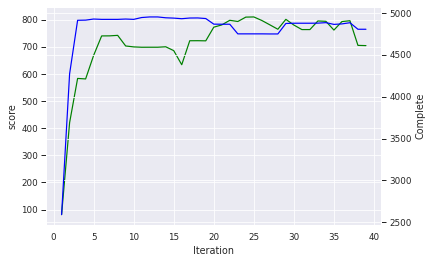

In [24]:
comparison_chart(metrics, "tigersnake")

# Within-assembly charts

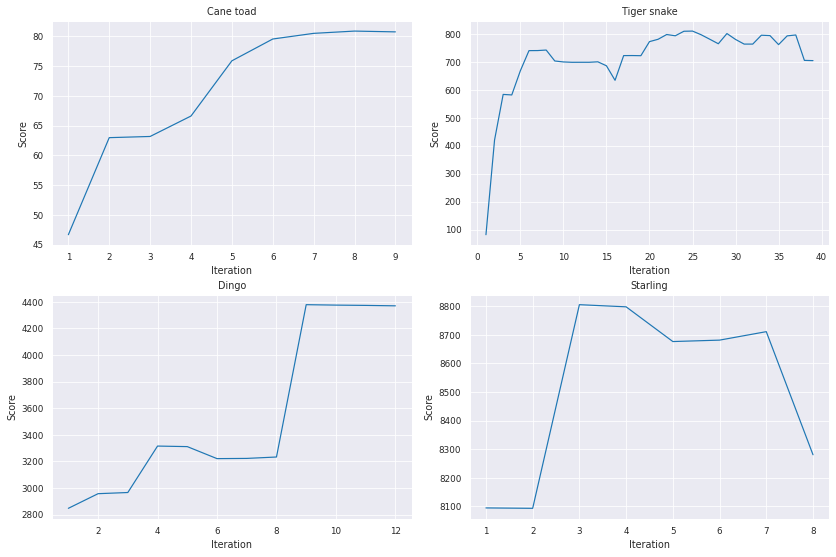

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
fig.tight_layout(pad=3.0)

sns.lineplot(ax=ax1, data=assembly_data[(assembly_data.Organism=="canetoad") & (assembly_data.max_gap == 10)], x="Iteration", y="score")
sns.lineplot(ax=ax2, data=assembly_data[(assembly_data.Organism=="tigersnake") & (assembly_data.max_gap == 10)], x="Iteration", y="score")
sns.lineplot(ax=ax3, data=assembly_data[(assembly_data.Organism=="sandy") & (assembly_data.max_gap == 10)], x="Iteration", y="score")
sns.lineplot(ax=ax4, data=assembly_data[(assembly_data.Organism=="starling") & (assembly_data.max_gap == 10)], x="Iteration", y="score")

ax1.set_title("Cane toad")
ax2.set_title("Tiger snake")
ax3.set_title("Dingo")
ax4.set_title("Starling")

ax1.set_ylabel("Score")
ax2.set_ylabel("Score")
ax3.set_ylabel("Score")
ax4.set_ylabel("Score")

fig.savefig(os.path.join(constants.image_out_dir, "pairs.pdf"))

Text(447.0613636363635, 0.5, 'Pairs')

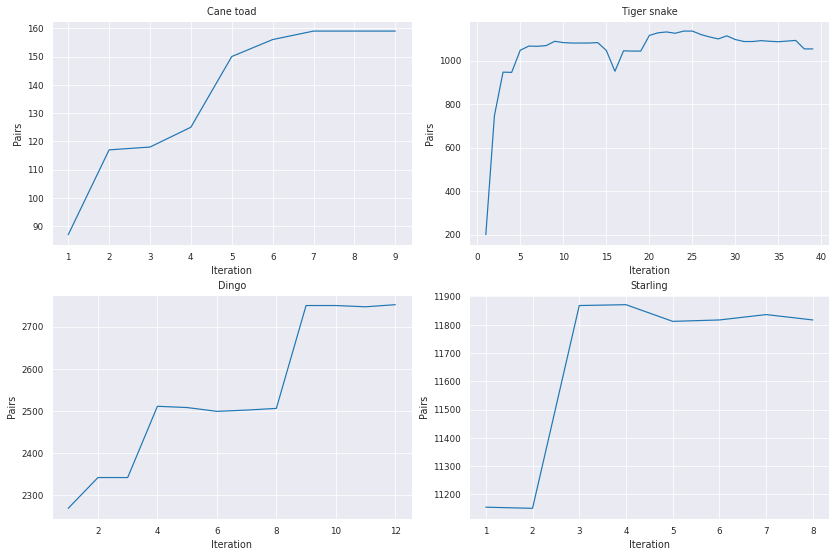

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
fig.tight_layout(pad=3.0)

sns.lineplot(ax=ax1, data=assembly_data[(assembly_data.Organism=="canetoad") & (assembly_data.max_gap == 10)], x="Iteration", y="valid")
sns.lineplot(ax=ax2, data=assembly_data[(assembly_data.Organism=="tigersnake") & (assembly_data.max_gap == 10)], x="Iteration", y="valid")
sns.lineplot(ax=ax3, data=assembly_data[(assembly_data.Organism=="sandy") & (assembly_data.max_gap == 10)], x="Iteration", y="valid")
sns.lineplot(ax=ax4, data=assembly_data[(assembly_data.Organism=="starling") & (assembly_data.max_gap == 10)], x="Iteration", y="valid")

ax1.set_title("Cane toad")
ax2.set_title("Tiger snake")
ax3.set_title("Dingo")
ax4.set_title("Starling")
ax1.set_ylabel("Pairs")
ax2.set_ylabel("Pairs")
ax3.set_ylabel("Pairs")
ax4.set_ylabel("Pairs")

#fig.savefig(os.path.join(constants.image_out_dir, "validpairs.pdf"))

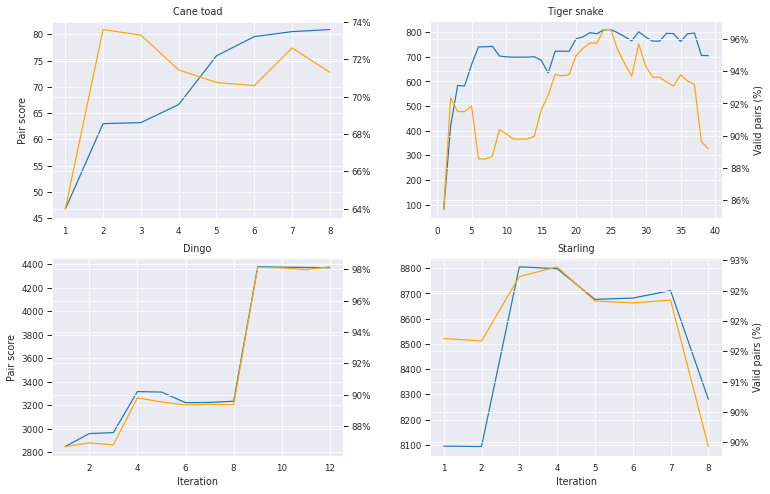

In [34]:
import matplotlib.ticker as mtick


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
#fig.tight_layout(w_pad=8.0, h_pad=3.0)
fig.subplots_adjust(wspace = 0.3)

nice = {
    "canetoad": "Cane toad",
    "tigersnake": "Tiger snake",
    "sandy": "Dingo",
    "starling": "Starling"
}
asses = ["canetoad", "tigersnake", "sandy", "starling"]
axes = [ax1,ax2,ax3,ax4]

for ass, ax in zip(asses, axes):
    twin = ax.twinx()
    sns.lineplot(ax=ax, data=assembly_data_full[(assembly_data_full.Organism==ass)], x="Iteration", y="score")

    sns.lineplot(ax=twin, data=assembly_data_full[(assembly_data_full.Organism==ass)], x="Iteration", y="valid_%",color="orange")
    ax.set_title(nice[ass])
    #twin.set_ylabel("Valid pairs (%)")

    twin.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=0))
    
    if ax in [ax1,ax2]:

        ax.set_xlabel("")
        
    if ax in [ax1,ax3]:
        ax.set_ylabel("Pair score")
    else:
        ax.set_ylabel("")
    
    if ax in [ax2,ax4]:
        twin.set_ylabel("Valid pairs (%)")
    else:
        twin.set_ylabel("")
        
        
fig.savefig(os.path.join(constants.image_out_dir, "pairsandpercent.pdf"))

In [ ]:
for ass, ax in zip(asses, axes):
    twin = ax.twinx()
    sns.lineplot(ax=ax, data=assembly_data_full[(assembly_data_full.Organism==ass)], x="Iteration", y="score")

    sns.lineplot(ax=twin, data=assembly_data_full[(assembly_data_full.Organism==ass)], x="Iteration", y="valid_%",color="orange")
    ax.set_title(nice[ass])
    #twin.set_ylabel("Valid pairs (%)")

    twin.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1,decimals=0))
    


Text(447.0613636363635, 0.5, '% valid')

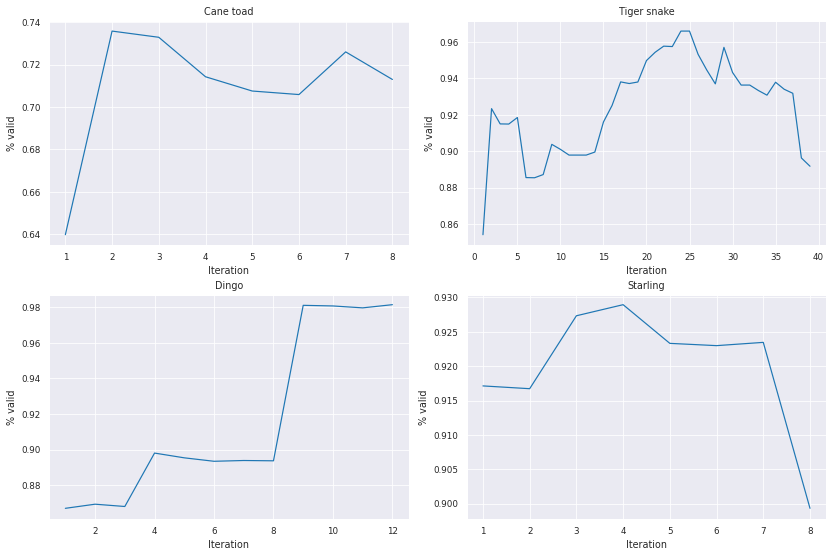

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2,nrows=2,figsize=(12, 8))
fig.tight_layout(pad=3.0)

sns.lineplot(ax=ax1, data=assembly_data_full[(assembly_data_full.Organism=="canetoad")], x="Iteration", y="valid_%")
sns.lineplot(ax=ax2, data=assembly_data_full[(assembly_data_full.Organism=="tigersnake")], x="Iteration", y="valid_%")
sns.lineplot(ax=ax3, data=assembly_data_full[(assembly_data_full.Organism=="sandy")], x="Iteration", y="valid_%")
sns.lineplot(ax=ax4, data=assembly_data_full[(assembly_data_full.Organism=="starling")], x="Iteration", y="valid_%")

ax1.set_title("Cane toad")
ax2.set_title("Tiger snake")
ax3.set_title("Dingo")
ax4.set_title("Starling")
ax1.set_ylabel("% valid")
ax2.set_ylabel("% valid")
ax3.set_ylabel("% valid")
ax4.set_ylabel("% valid")

#fig.savefig(os.path.join(constants.image_out_dir, "validpairs.pdf"))

# Investigations into behaviour

In [36]:
ts_metrics = metrics[(metrics.Organism == "canetoad") & (metrics.max_gap == 10)].copy()
ts_metrics["valid_diff"] = ts_metrics["valid"].diff()
ts_metrics["score_diff"] = ts_metrics["score"].diff()

ts_metrics[["assembly", "Iteration", "Stage", "Tools", "valid", "score", "valid_diff", "score_diff"]]

,assembly,Iteration,Stage,Tools,valid,score,valid_diff,score_diff
70,canetoad.v2.2,1.0,Assembly,"Abyss, DBG2OLC, Pilon, Arrow",87.0,46.658442,NaN,NaN
78,canetoad.v3.0.flye,2.0,Assembly,Flye,117.0,62.984163,30.0,16.325722
86,canetoad.v3.1.tidy,3.0,Tidying,Diploidocus,118.0,63.184163,1.0,0.200000
94,canetoad.v3.2.hypo,4.0,Polishing,HyPo,125.0,66.623052,7.0,3.438889
102,canetoad.v3.3.arcs,5.0,Scaffolding,ARCS,150.0,75.908009,25.0,9.284957
110,canetoad.v3.4.sspace,6.0,Scaffolding,SSPACe,156.0,79.576263,6.0,3.668254
118,canetoad.v3.5.gapfinisher,7.0,Gapfilling,Gapfinisher,159.0,80.526263,3.0,0.950000
126,canetoad.v3.6.hypo,8.0,Polishing,HyPo,159.0,80.909596,0.0,0.383333
134,canetoad.v3.7.tidy,9.0,Tidying,Diploidocus,159.0,80.776263,0.0,-0.133333
